1. Point/Intensity transformation: Negative of an image. <br>
First print the maximum intensity value of input image and then subtract the intensity values
from max value.


In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

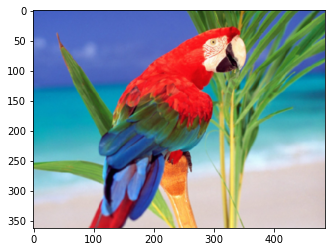

In [2]:
img = Image.open("images/parrot.png")
plt.imshow(img)
img_arr = np.array(img)

In [3]:
print("Shape of the image : ", img_arr.shape)

Shape of the image :  (362, 486, 3)


In [4]:
print("Min pixel value : ", np.min(img_arr))
print("Max pixel value : ", np.max(img_arr))

Min pixel value :  0
Max pixel value :  255


In [5]:
img_neg = np.max(img_arr) - img_arr

Text(0.5, 1.0, 'Negative Image')

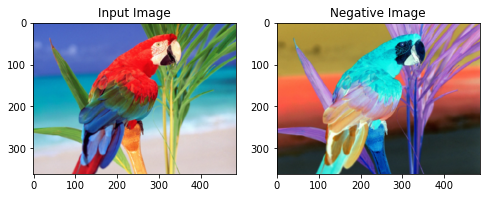

In [6]:
plt.figure(figsize = (8, 8))
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title("Input Image")
plt.subplot(1, 2, 2)
plt.imshow(img_neg)
plt.title("Negative Image")

2. Point/Intensity transformation: Log transformation


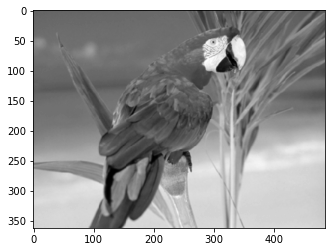

In [7]:
img_gray = img.convert('L')
plt.imshow(img_gray, cmap = 'gray')
#img_gray.show()

In [8]:
img_gray_arr = np.array(img_gray)
print(img_gray_arr.shape)

(362, 486)


In [9]:
c = 255 / (np.log(1 + np.max(img_gray_arr)))
print(c)

46.05103967062828


In [10]:
img_log =  c * np.log(img_gray_arr + 1)
img_log = np.array(img_log, dtype = np.uint8)

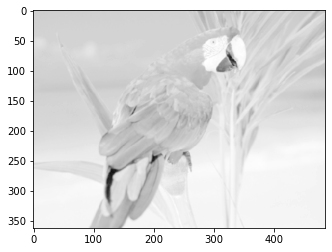

In [11]:
plt.imshow(img_log, cmap = 'gray')

Text(0.5, 1.0, 'Log Transformation')

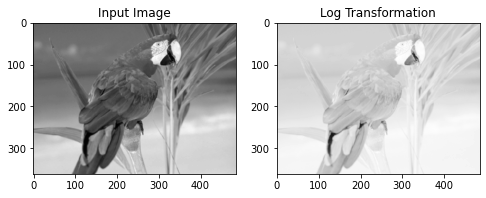

In [12]:
plt.figure(figsize = (8, 8))
plt.subplot(1, 2, 1)
plt.imshow(img_gray_arr, cmap = 'gray')
plt.title("Input Image")
plt.subplot(1, 2, 2)
plt.imshow(img_log, cmap = 'gray')
plt.title("Log Transformation")

3. Histogram Processing <br>
a) To plot the histogram of R,G,B channels of an image. First split your RGB input
image into three channels and then plot the histograms of these three R,G,B
channels in same graph. In graph, x-axis: Pixel value, y-axis: Frequency of those
pixels

In [13]:
img = Image.open("images/parrot.png")
img_r, img_gr, img_b = img.split()

Text(0.5, 1.0, 'Blue')

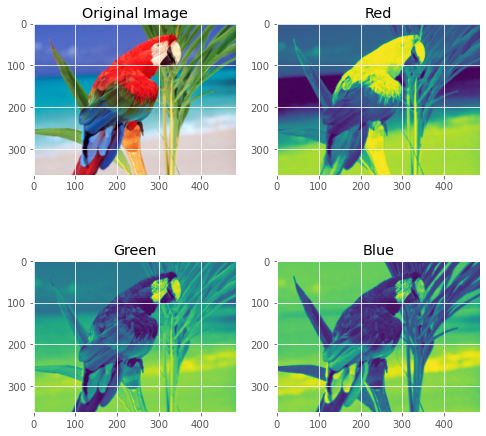

In [14]:
plt.style.use('ggplot')
plt.figure(figsize = (8, 8))

plt.subplot(221)
plt.imshow(img)
plt.title('Original Image')

plt.subplot(222)
plt.imshow(img_r)
plt.title('Red')

plt.subplot(223)
plt.imshow(img_gr)
plt.title('Green')

plt.subplot(224)
plt.imshow(img_b)
plt.title('Blue')

In [15]:
print("Original Image shape : ", np.asarray(img).shape)
print("Shape of Red Channel : ", np.asarray(img_r).shape)
print("Shape of Green Channel : ", np.asarray(img_gr).shape)
print("Shape of Blue Channel : ", np.asarray(img_b).shape)

Original Image shape :  (362, 486, 3)
Shape of Red Channel :  (362, 486)
Shape of Green Channel :  (362, 486)
Shape of Blue Channel :  (362, 486)


(array([[  0.,  14., 381., ...,   0.,   0.,   0.],
        [  0.,  17., 380., ...,   0.,   0.,   0.],
        [  0.,  20., 382., ...,   0.,   0.,   0.],
        ...,
        [  0.,   0.,   0., ...,  35., 383.,  42.],
        [  0.,   0.,   0., ...,  33., 385.,  43.],
        [  0.,   0.,   0., ...,  31., 389.,  42.]]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <a list of 362 Lists of Patches objects>)

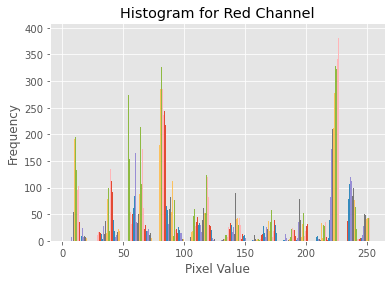

In [16]:
# plotting the histogram of Red Channel of the image.

plt.title("Histogram for Red Channel")
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.hist(img_r)

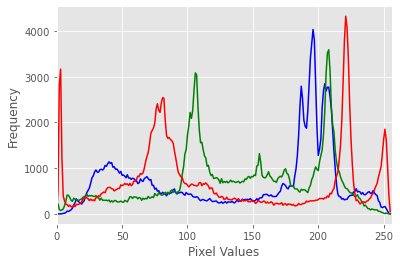

In [23]:
# plotting the histogram of Red Channel of the image.
import cv2
img = cv2.imread("images/parrot.png")
color = ['b','g','r']
for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.xlabel("Pixel Values")
plt.ylabel("Frequency")
plt.show()

b) Histogram Equalization
For input image, show 4 subplots: original image, its histogram, new image after equalization and its histogram plot.

C:\Users\vinee\anaconda3\lib\site-packages\skimage\exposure\exposure.py:181: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  hist, bin_centers = histogram(image, nbins)


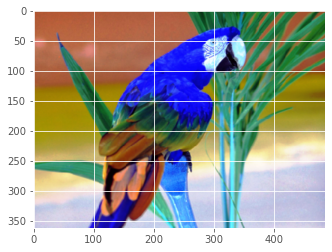

In [25]:
from skimage.exposure import equalize_hist

eq = np.float32(equalize_hist(img))
plt.imshow(eq)

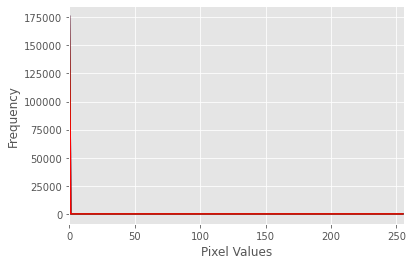

In [27]:
color = ['b','g','r']
for i,col in enumerate(color):
    histr = cv2.calcHist([eq],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.xlabel("Pixel Values")
plt.ylabel("Frequency")
plt.show()

4. Contrast Stretching:
Write a program for contrast stretching of an RGB image and then draw the histograms of R,G,B channels of output image. The following section describes how to implement contrast-stretching using the PIL library.

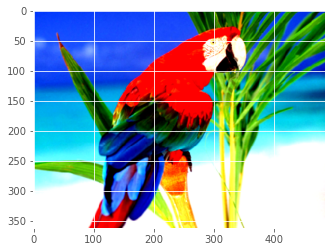

In [28]:
from PIL import Image, ImageEnhance
img = Image.open("images/parrot.png")
new = ImageEnhance.Contrast(img)
res = new.enhance(2)
plt.imshow(res)

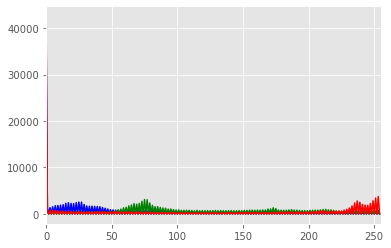

In [29]:
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([np.float32(res)],[i],None,[255],[0,255])
    plt.plot(histr,color = col)
    plt.xlim([0,255])
plt.show()